In [165]:
import numpy as np
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pixiedust
import numpy as np

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def linear(x):
    return x

def linear_derivative(x):
    return 1

def rmse(yhat,y):
    return np.mean((yhat-y)**2)**.5

def ce(yhat,y):
    return -np.log(yhat[np.arange(len(yhat)), y])

# Classification

In [173]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [174]:
class NeuralNetwork:
    def __init__(self,hidden_units,iters=100,lr=.001):
        self.hidden_units = hidden_units
        self.lr = lr
        self.iters = iters
    
    def fit(self, x, y):
        self.input = x
        self.y = y
        self.losses = []
        n = x.shape[1]
        self.weights1 = np.random.randn(n,self.hidden_units)
        self.bias1 = np.ones((1,self.hidden_units))
        self.weights2 = np.random.randn(self.hidden_units,2)
        self.bias2 = np.ones((1, 2))
        for epoch in range(self.iters):
            self.fforward(self.input)
            self.backprop()                


    def fforward(self,x):
        self.z1 = np.dot(x, self.weights1) + self.bias1
        self.layer1  = sigmoid(self.z1)
        self.z2 = np.dot(self.layer1, self.weights2) + self.bias2
        self.layer2 = sigmoid(self.z2)
        self.yhat = self.layer2


    def backprop(self):
        self.losses.append(np.mean(ce(self.yhat,self.y)))
        self.yhat[np.arange(len(self.yhat)), self.y] -= 1
        self.yhat /= len(self.yhat)
        grad_w1 = np.dot(self.input.T,  (np.dot(self.yhat, self.weights2.T) * sigmoid_derivative(self.layer1)))
        grad_w2 = np.dot(self.layer1.T, self.yhat)
                             
        grad_b1 = np.sum((self.yhat @ self.weights2.T) * sigmoid_derivative(self.layer1), axis=0, keepdims=True)
        grad_b2 = np.sum(self.yhat, axis=0, keepdims=True)
        
        # update the weights with the derivative (slope) of the loss function
        self.weights1 -= self.lr*grad_w1
        self.weights2 -= self.lr*grad_w2
        self.bias1    -= self.lr*grad_b1
        self.bias2    -= self.lr*grad_b2
        self.grad_w1, self.grad_w2 = grad_w1,grad_w2
        
        
    def predict(self, x=None):
        if x is not None:
            self.fforward(x)
        return self.yhat


In [177]:
hidden = 100
epochs = 100
nn=NeuralNetwork(hidden, epochs, lr=.01)
nn.fit(X_train,y_train)
preds  = nn.predict(X_test)
# valid accuracy
(np.argmax(preds,1)==y_test).mean()

0.9440559440559441

In [178]:
nn.losses

[6.09116388707227,
 5.896632470987907,
 5.703460504770888,
 5.51186485593988,
 5.322093701574511,
 5.134426673991226,
 4.949173370059071,
 4.766669276319891,
 4.587268419137859,
 4.411332914726644,
 4.239220731493541,
 4.071273719730792,
 3.9078078207212332,
 3.7491064177718143,
 3.5954166022337004,
 3.4469472997362254,
 3.303868012069037,
 3.1663073192516427,
 3.034351002254972,
 2.9080403444817358,
 2.7873715272800204,
 2.6722969118557147,
 2.5627285116077556,
 2.4585433769435885,
 2.3595901904037335,
 2.2656962171770645,
 2.1766738481864505,
 2.0923262097174424,
 2.012451589646453,
 1.9368466711516805,
 1.8653087334011134,
 1.7976370678231004,
 1.7336338789848322,
 1.6731049097274875,
 1.6158599713777697,
 1.561713489893568,
 1.510485112435217,
 1.4620003663725634,
 1.416091329475391,
 1.37259725645627,
 1.3313651097113715,
 1.2922499554035294,
 1.2551152039699036,
 1.2198326918103173,
 1.1862826151986525,
 1.1543533370280024,
 1.1239410918900403,
 1.0949496160432552,
 1.06728972718

#### References

https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/algorithms/neuralnetwork/NN.py

# Regression

Does not produce correct results unfortunately

In [179]:
X,y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

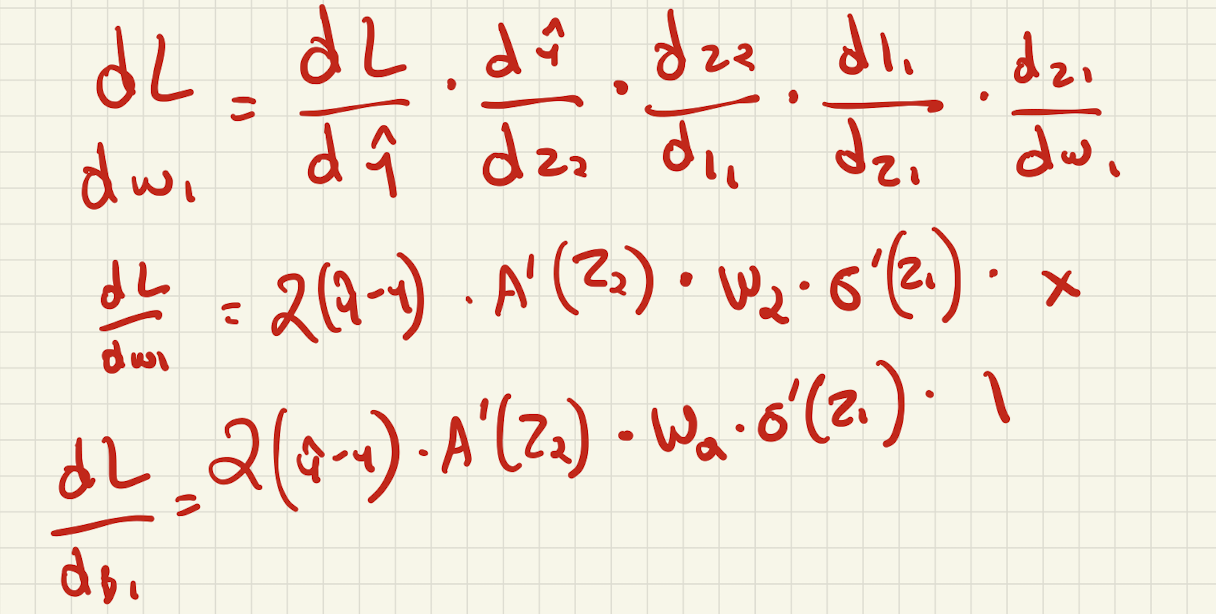

In [206]:
# %%pixie_debugger 

class NeuralNetwork:
    def __init__(self,hidden_units,iters=100,lr=.001):
        self.hidden_units = hidden_units
        self.lr = lr
        self.iters = iters
    
    def fit(self, x, y):
        self.input = x
        self.y = y
        self.m, self.n = x.shape[1]
        self.weights1 = np.random.randn(self.n,self.hidden_units)
        self.bias1 = np.ones((1,self.hidden_units))
        self.weights2 = np.random.randn(self.hidden_units,1)
        self.bias2 = np.ones((1, 1))
        for epoch in range(self.iters):
            self.fforward(self.input)
            self.backprop()

    def fforward(self,x):
        self.z1 = np.dot(x, self.weights1) + self.bias1
        self.layer1  = sigmoid(self.z1)
        self.z2 = np.dot(self.layer1, self.weights2) + self.bias2
        self.layer2 = linear(self.z2)
        self.yhat = self.layer2


    def backprop(self):
        self.loss_der = 2*(self.y - self.yhat)/self.m
        grad_w1 = np.dot(self.input.T,  (np.dot(self.loss_der * linear_derivative(self.z2), self.weights2.T) * sigmoid_derivative(self.layer1)))
        grad_w2 = np.dot(self.layer1.T, (self.loss_der * linear_derivative(self.z2)))
                      
        grad_b1 = np.sum(((self.loss_der * linear_derivative(self.layer2)) @ self.weights2.T) * sigmoid_derivative(self.layer1), axis=0, keepdims=True)
        grad_b2 = np.sum((self.loss_der * linear_derivative(self.layer2)), axis=0, keepdims=True)
        
        # update the weights with the derivative (slope) of the loss function
        self.weights1 -= self.lr*grad_w1
        self.weights2 -= self.lr*grad_w2
        self.bias1    -= self.lr*grad_b1
        self.bias2    -= self.lr*grad_b2
        self.grad_w1, self.grad_w2 = grad_w1,grad_w2
                             
    def predict(self, x=None):
        if x:
            self.fforward(x)
        return self.yhat      

In [211]:
hidden = 1
epochs = 100
nn = NueralNetwork(hidden,iters=epochs,lr=.00001)
nn.fit(x_train,y_train.reshape(-1,1))

In [212]:
# NN model vs. a model which predicts the mean
rmse(nn.predict(),y_train), rmse(y_train.mean()*np.ones((y_train.shape)),y_train)

(15.211256231748315, 9.41709782996042)

In [213]:
# some shapes for debugging
nn.grad_w1.shape, nn.grad_w2.shape, nn.weights1.shape, nn.weights2.shape

((13, 1), (1, 1), (13, 1), (1, 1))